In [ ]:
'''
=================================================
Graded Challenge 3

Nama  : Delfrin Adiyatma Situmeang 
Batch : HCK

Program ini dibuat untuk menganalisis dan mengetahui bagaimana situsi jual-beli seblak di tokopedia, seperti kesukaan orang, kuantitas terjual, pendapatan yang mungkin bisa diperoleh, serta animo masyarakat.
=================================================
'''

# WEB SCRAPING

In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver

#mendefinisikan chromedriver
driver = webdriver.Chrome('')

#mendapatkan url
url = f"https://www.tokopedia.com/search?navsource=&page=1&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st="
driver.get(url)

html = driver.page_source

soup = BeautifulSoup(html, "html.parser")
print(soup.prettify()[:700])

<html data-rh="lang,translate" lang="id" translate="no">
 <head>
  <title>
   Jual seblak | Tokopedia
  </title>
  <meta charset="utf-8"/>
  <meta content="initial-scale=1, minimum-scale=1, maximum-scale=5, user-scalable=yes, width=device-width" name="viewport"/>
  <link crossorigin="" href="https://assets.tokopedia.net" rel="preconnect"/>
  <link href="https://assets.tokopedia.net" nonce="" rel="dns-prefetch"/>
  <link crossorigin="" href="https://gql.tokopedia.com" rel="preconnect"/>
  <link href="https://gql.tokopedia.com" nonce="" rel="dns-prefetch"/>
  <link crossorigin="" href="https://googleads.g.doubleclick.net" rel="preconnect"/>
  <link href="https://googleads.g.doubleclick.net" no


In [4]:
import pandas as pd

# Inisialisasi list kosong untuk setiap kolom
nama_produk = []
harga = []
lokasi_toko = []
nama_toko = []
banyak_terjual = []
rating = []

# Mengambil data untuk setiap kolom dari 10 halaman
for i in range(1, 11):
    url = f"https://www.tokopedia.com/search?navsource=&page={i}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st="
    driver.get(url)
    bottom=False
    a=0
    while not bottom:
        new_height = driver.execute_script("return document.body.scrollHeight")
        driver.execute_script(f"window.scrollTo(0, {a});")
        if a > new_height:
            bottom=True
        a+=30
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    filter_iklan = soup.find_all('div', {'data-ssr':"contentProductsSRPSSR"})
    for blok_noniklan in filter_iklan[0].find_all('div', class_="css-1asz3by"):
        # Mengambil data untuk setiap kolom pada halaman tersebut
        listnama_produk =  blok_noniklan.find_all('div', attrs = {'data-testid':"spnSRPProdName"})
        if listnama_produk == []:
            nama_produk.append(None)
        else:
            nama_produk.append(listnama_produk[0].get_text())

        listharga_produk =  blok_noniklan.find_all('div', attrs = {'data-testid':"spnSRPProdPrice"})
        if listharga_produk == []:
            harga.append(None)
        else:
            harga.append(listharga_produk[0].get_text())

        listlokasi_toko =  blok_noniklan.find_all('span', {'data-testid':"spnSRPProdTabShopLoc"})
        if listlokasi_toko == []:
            lokasi_toko.append(None)
        else:
            lokasi_toko.append(listlokasi_toko[0].get_text())

        listnama_toko =  blok_noniklan.find_all('span', {'class':"prd_link-shop-name css-1kdc32b flip"})
        if listnama_toko == []:
            nama_toko.append(None)
        else:
            nama_toko.append(listnama_toko[0].get_text())

        listbanyak_terjual =  blok_noniklan.find_all('span', {'class':"prd_label-integrity css-1sgek4h"})
        if listbanyak_terjual == []:
            banyak_terjual.append(None)
        else:
            banyak_terjual.append(listbanyak_terjual[0].get_text())

        listrating =  blok_noniklan.find_all('span', {'class':"prd_rating-average-text css-t70v7i"})
        if listrating == []:
            rating.append(None)
        else:
            rating.append(listrating[0].get_text())

# Membuat DataFrame dari list yang telah dikumpulkan
data = pd.DataFrame({
    'nama_produk': nama_produk,
    'harga': harga,
    'lokasi_toko': lokasi_toko,
    'nama_toko': nama_toko,
    'banyak_terjual': banyak_terjual,
    'rating': rating,
})

data

,nama_produk,harga,lokasi_toko,nama_toko,banyak_terjual,rating
0,"Seblak Rafael, Seblak Coet Instan Halal",Rp25.000,Depok,Brother Meat Shop,500+ terjual,5.0
1,Basranger - Seblak Instan Basranger,Rp20.000,Kab. Bandung Barat,DeveniDives,None,None
2,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,Rp17.000,Tangerang Selatan,Central Seblak Nusantara,2rb+ terjual,4.9
3,GFS Seblak Basah Instan Original - Tinggal Sed...,Rp16.618,Cimahi,Lakoca Official Shop,100+ terjual,4.9
4,Kerupuk seblak pedas,Rp15.000,Cimahi,MACALONI SNACK,10 terjual,5.0
...,...,...,...,...,...,...
834,KERUPUK SEBLAK PEDAS DAUN JERUK 100 GR,Rp4.500,Jakarta Selatan,BociKakang,500+ terjual,4.8
835,SEBLAK KERING 100gr DUA VARIAN RASA,Rp4.500,Jakarta Selatan,jajanangarut19,250+ terjual,4.6
836,Seblak instant isi korean tteokbokki dan odeng,Rp16.900,Kab. Bogor,dse_food,None,None
837,KERUPUK BAWANG WARNA MERAH KRUPUK SEBLAK MENTA...,Rp11.500,Jakarta Selatan,BociKakang,100+ terjual,4.9


# DATA PREPARATION

*DATA EXPLORATION*

In [5]:
#cek 10 baris pertama dari data
data.head(10)

,nama_produk,harga,lokasi_toko,nama_toko,banyak_terjual,rating
0,"Seblak Rafael, Seblak Coet Instan Halal",Rp25.000,Depok,Brother Meat Shop,500+ terjual,5.0
1,Basranger - Seblak Instan Basranger,Rp20.000,Kab. Bandung Barat,DeveniDives,None,None
2,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,Rp17.000,Tangerang Selatan,Central Seblak Nusantara,2rb+ terjual,4.9
3,GFS Seblak Basah Instan Original - Tinggal Sed...,Rp16.618,Cimahi,Lakoca Official Shop,100+ terjual,4.9
4,Kerupuk seblak pedas,Rp15.000,Cimahi,MACALONI SNACK,10 terjual,5.0
5,"Seblak Rafael, Seblak Coet Instan Halal",Rp25.000,Depok,Brother Meat Shop,500+ terjual,5.0
6,SEBLAK INSTANT TERMURAH,Rp4.450,Jakarta Timur,Pusat Cuankie & Cemilan Frozen,10rb+ terjual,4.8
7,Seblak Instan Pedas Home Made,Rp3.500,Tangerang Selatan,the Dhecip,3rb+ terjual,4.9
8,Kylafood Seblak Cup,Rp11.000,Jakarta Selatan,Kylafood Jakarta,100+ terjual,5.0
9,seblak ceker pedas,Rp8.950,Tangerang Selatan,snack_it,250+ terjual,4.9


Terlihat bahwa data terdiri dari 7 kolom yaitu, nama_produk, harga, lokasi_toko, nama_toko, banyak_terjual, rating, dan link.

In [6]:
#menampilkan informasi rangkuman data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nama_produk     839 non-null    object
 1   harga           839 non-null    object
 2   lokasi_toko     839 non-null    object
 3   nama_toko       838 non-null    object
 4   banyak_terjual  807 non-null    object
 5   rating          780 non-null    object
dtypes: object(6)
memory usage: 39.5+ KB


Data terdiri dari 300+ baris. Terlihat bahwa masih beberapa tipe data yang salah dari kolom pada dataframe, harga dalam rupiah seharusnya bertipe integer, banyak_terjual seharusnya bertipe integer, dan rating seharusnya bertipe float. Sehingga selanjutnya kolom - kolom dataframe tersebut akan diubah menjadi tipe yang sesuai

In [7]:
data.isnull().sum()

nama_produk        0
harga              0
lokasi_toko        0
nama_toko          1
banyak_terjual    32
rating            59
dtype: int64

Pada kolom banyak_terjual dan rating terdapat missing value yang menandakan bahwa terdapat beberapa product yang belum dibeli maupun belum diberi rating, sehingga missing value tersebut akan di handle

In [8]:
#Cek data duplikat
data.duplicated().sum()

89

Terdapat beberapa duplikasi pada data, maka baris duplikasi tersebut akan di drop

*DATA CLEANING*

In [9]:
#drop data duplikat
data.drop_duplicates(inplace=True)

In [10]:
#handle missing value dengan mereplace dengan 0
data = data.fillna('0')

In [11]:
#cek missing value
data.isnull().sum()

nama_produk       0
harga             0
lokasi_toko       0
nama_toko         0
banyak_terjual    0
rating            0
dtype: int64

In [12]:
#Membersihkan observasi dari tiap - tiap kolom yang ada pada data agar tipenya bisa disesuaikan
data['harga'] = data['harga'].str.replace('Rp','')
data['harga'] = data['harga'].str.replace('.','')
data['banyak_terjual'] = data['banyak_terjual'].str.replace('terjual', '')
data['banyak_terjual'] = data['banyak_terjual'].str.replace(' ', '')
data['banyak_terjual'] = data['banyak_terjual'].str.replace('+', '')
data['banyak_terjual'] = data['banyak_terjual'].str.replace('rb', '000')
data

,nama_produk,harga,lokasi_toko,nama_toko,banyak_terjual,rating
0,"Seblak Rafael, Seblak Coet Instan Halal",25000,Depok,Brother Meat Shop,500,5.0
1,Basranger - Seblak Instan Basranger,20000,Kab. Bandung Barat,DeveniDives,0,0
2,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Tangerang Selatan,Central Seblak Nusantara,2000,4.9
3,GFS Seblak Basah Instan Original - Tinggal Sed...,16618,Cimahi,Lakoca Official Shop,100,4.9
4,Kerupuk seblak pedas,15000,Cimahi,MACALONI SNACK,10,5.0
...,...,...,...,...,...,...
828,seblak instan jawara pedas sehot bandung,12900,Cimahi,cemilan Bandungstore,60,4.9
829,seblak basreng pedas original exstra daun jeru...,14500,Kab. Bandung,seblak bandung99,26,4.8
830,Kerupuk Seblak RAFAEL / Krupuk Seblak Pedas Ba...,16000,Tangerang Selatan,ANUM SARI,25,4.3
832,KERUPUK SEBLAK KENCUR PEDAS 1kG,45000,Depok,AQILA FROZEN FOOD JAKARTA,40,0


In [13]:
#Mengganti tipe data
data['harga'] = data['harga'].astype(int)
data['banyak_terjual'] = data['banyak_terjual'].astype(int)
data['rating'] = data['rating'].astype(float)
data

,nama_produk,harga,lokasi_toko,nama_toko,banyak_terjual,rating
0,"Seblak Rafael, Seblak Coet Instan Halal",25000,Depok,Brother Meat Shop,500,5.0
1,Basranger - Seblak Instan Basranger,20000,Kab. Bandung Barat,DeveniDives,0,0.0
2,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Tangerang Selatan,Central Seblak Nusantara,2000,4.9
3,GFS Seblak Basah Instan Original - Tinggal Sed...,16618,Cimahi,Lakoca Official Shop,100,4.9
4,Kerupuk seblak pedas,15000,Cimahi,MACALONI SNACK,10,5.0
...,...,...,...,...,...,...
828,seblak instan jawara pedas sehot bandung,12900,Cimahi,cemilan Bandungstore,60,4.9
829,seblak basreng pedas original exstra daun jeru...,14500,Kab. Bandung,seblak bandung99,26,4.8
830,Kerupuk Seblak RAFAEL / Krupuk Seblak Pedas Ba...,16000,Tangerang Selatan,ANUM SARI,25,4.3
832,KERUPUK SEBLAK KENCUR PEDAS 1kG,45000,Depok,AQILA FROZEN FOOD JAKARTA,40,0.0


In [14]:
#cek hasil pembersihan data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_produk     750 non-null    object 
 1   harga           750 non-null    int32  
 2   lokasi_toko     750 non-null    object 
 3   nama_toko       750 non-null    object 
 4   banyak_terjual  750 non-null    int32  
 5   rating          750 non-null    float64
dtypes: float64(1), int32(2), object(3)
memory usage: 35.2+ KB


Data telah berhasil dibersihkan

# Business Understanding & Problem Statement

`Problem Statements with SMART framework:`

1. **Specific**:  Menganalisis penjualan produk seblak di platform Tokopedia untuk mengetahui apakah ada minat yang besar dari masyarakat   terhadap produk tersebut.

2. **Measurable**: Mengumpulkan data penjualan produk seblak dari Tokopedia sebanyak 10 page menggunakan teknik web scraping. 

3. **Achievable**: Akan dilakukan analisis pada jumlah penjualan, ulasan pelanggan, dan rating produk.

4. **Relevant**: Analisis data akan membantu untuk mendapatkan pemahaman yang lebih baik tentang popularitas dan keberhasilan produk.

5. **Time-Bound**: Pengumpulan data menggunakan web scraping akan diselesaikan dalam waktu 2 hari, kemudian 3 hari untuk menganalisis data. Dengan demikian, keseluruhan proyek ini diharapkan selesai dalam waktu 5 hari.

`Problem statement:`

Proyek ini bertujuan untuk menganalisis minat masyarakat terhadap produk seblak di platform Tokopedia dengan mengumpulkan data penjualan produk seblak dari 10 halaman menggunakan web scraping, dan kemudian menganalisis jumlah penjualan, ulasan pelanggan, dan rating produk dalam total waktu 5 hari.



# ANALYSIS

*SOAL NO. 1*

Untuk mencari tahu tentang distribusi dan persebaran dari data, kita akan menghitung beberapa aspek statistik yaitu mean, median, standar deviasi, skewness, dan kurtosis dari kolom harga, banyak produk terjual, dan rating produk.

In [15]:
#Menampilkan mean, median, dan standar deviasi dari harga seblak
data['harga'].describe()

count       750.000000
mean      23819.762667
std       31686.354981
min         400.000000
25%        8962.250000
50%       15000.000000
75%       25500.000000
max      499999.000000
Name: harga, dtype: float64

In [16]:
#menampilkan skewness dan kurtosis dari harga seblak
print(f"Skewness: {data['harga'].skew()}")
print(f"Kurtosis: {data['harga'].kurtosis()}")

Skewness: 6.483711673622601
Kurtosis: 74.56022303755336


`Dari nilai skewness sebesar 6.567735588348815, kita dapat menyimpulkan bahwa distribusi data memiliki skewness yang sangat positif. Dengan kata lain, terdapat kecenderungan bahwa terdapat sejumlah besar nilai yang jauh lebih tinggi dari nilai tengah.`

`nilai kurtosis sebesar 75.81048403590711, yang menandakan adanya leptokurtic distributions. Ini menandakan bahwa terdapat konsentrasi yang sangat tinggi dari nilai-nilai di sekitar nilai tengah, yang bisa menunjukkan adanya outlier yang signifikan atau distribusi yang sangat tidak normal.`

In [17]:
#Menampilkan mean, median, dan standar deviasi dari banyak seblak yang terjual
data['banyak_terjual'].describe()

count      750.000000
mean       410.976000
std       1225.002899
min          0.000000
25%         20.000000
50%         80.000000
75%        250.000000
max      10000.000000
Name: banyak_terjual, dtype: float64

In [18]:
#menampilkan skewness dan kurtosis dari banyak seblak yang terjual
print(f"Skewness: {data['banyak_terjual'].skew()}")
print(f"Kurtosis: {data['banyak_terjual'].kurtosis()}")

Skewness: 5.708079487256087
Kurtosis: 37.44593121510346


`Dari nilai skewness sebesar 6.2332840985340034, kita dapat menyimpulkan bahwa distribusi data memiliki skewness yang sangat positif. Dengan kata lain, terdapat kecenderungan bahwa terdapat sejumlah besar nilai yang jauh lebih tinggi dari nilai tengah.`

`nilai kurtosis sebesar 44.65768102787601, yang menandakan adanya leptokurtic distributions. Ini menandakan bahwa terdapat konsentrasi yang sangat tinggi dari nilai-nilai di sekitar nilai tengah, yang bisa menunjukkan adanya outlier yang signifikan atau distribusi yang sangat tidak normal.`

In [19]:
#Menampilkan mean, median, dan standar deviasi dari rating produk seblak
data['rating'].describe()

count    750.000000
mean       4.529200
std        1.271423
min        0.000000
25%        4.800000
50%        4.900000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [20]:
#menampilkan skewness dan kurtosis dari rating produk seblak
print(f"Skewness: {data['rating'].skew()}")
print(f"Kurtosis: {data['rating'].kurtosis()}")

Skewness: -3.241422131051583
Kurtosis: 8.701502285144809


`Dari nilai skewness sebesar -3.1874018048003685, kita dapat menyimpulkan bahwa distribusi data memiliki skewness yang sangat negatif. yang berarti terdapat kecenderungan bahwa terdapat sejumlah besar nilai yang jauh lebih rendah dari nilai tengah.`

`nilai kurtosis sebesar 8.394443381583327, yang menandakan adanya leptokurtic distributions. Ini menandakan bahwa terdapat konsentrasi yang sangat tinggi dari nilai-nilai di sekitar nilai tengah, yang bisa menunjukkan adanya outlier yang signifikan atau distribusi yang sangat tidak normal.`

*SOAL NO. 2*

Akan dibuat interval kepercayaan untuk memperkirakan potensi pendapatan yang mungkin diperoleh per bulannya. Terlebih dahulu akan dibuat kolom pendapatan/bulan dengan mengalikan kolom harga dan kolom banyak_terjual.

In [21]:
from scipy import stats
import numpy as np

In [22]:
#Membuat kolom baru yaitu pendapatan per bulan untuk dianalisis
data['total_pendapatan/bulan'] = data['harga'] * data['banyak_terjual']
data

,nama_produk,harga,lokasi_toko,nama_toko,banyak_terjual,rating,total_pendapatan/bulan
0,"Seblak Rafael, Seblak Coet Instan Halal",25000,Depok,Brother Meat Shop,500,5.0,12500000
1,Basranger - Seblak Instan Basranger,20000,Kab. Bandung Barat,DeveniDives,0,0.0,0
2,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Tangerang Selatan,Central Seblak Nusantara,2000,4.9,34000000
3,GFS Seblak Basah Instan Original - Tinggal Sed...,16618,Cimahi,Lakoca Official Shop,100,4.9,1661800
4,Kerupuk seblak pedas,15000,Cimahi,MACALONI SNACK,10,5.0,150000
...,...,...,...,...,...,...,...
828,seblak instan jawara pedas sehot bandung,12900,Cimahi,cemilan Bandungstore,60,4.9,774000
829,seblak basreng pedas original exstra daun jeru...,14500,Kab. Bandung,seblak bandung99,26,4.8,377000
830,Kerupuk Seblak RAFAEL / Krupuk Seblak Pedas Ba...,16000,Tangerang Selatan,ANUM SARI,25,4.3,400000
832,KERUPUK SEBLAK KENCUR PEDAS 1kG,45000,Depok,AQILA FROZEN FOOD JAKARTA,40,0.0,1800000


In [23]:
#cek kolom pendapatan/bulan
data['total_pendapatan/bulan'].describe()

count    7.500000e+02
mean     6.925538e+06
std      2.670733e+07
min      0.000000e+00
25%      3.000000e+05
50%      1.024500e+06
75%      3.204688e+06
max      3.250000e+08
Name: total_pendapatan/bulan, dtype: float64

In [24]:
#menghitung confidence interval dengan tingkat kepercayaan 95%
std = data['total_pendapatan/bulan'].std()
N = len(data)
low, up = stats.norm.interval(0.95,loc=data['total_pendapatan/bulan'].mean(),scale=std/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 5014154.299414823
Upper Limit: 8836921.916585177


`Kita dapat menyimpulkan bahwa dengan tingkat kepercayaan 95% bahwa pendapatan dari penjualan produk seblak akan berada pada rentang 4062336.5312115727 sampai 7342141.876896535, per-bulannya`

*SOAL NO. 3*

Akan dilakukan pengujian terhadap ada atau tidaknya perbedaan harga barang di jabodetabek dan diluar jabodetabek. Terlebih dahulu akan dibuat dataframe baru untuk kedua kategori tersebut

In [25]:
#Membuat DataFrame baru yang hanya berisi data dengan kota yang termasuk dalam wilayah Jabodetabek
data_jabodetabek = data[data['lokasi_toko'].str.contains('Jakarta|Bogor|Depok|Tangerang|Bekasi', regex=True)]

#Membuat DataFrame baru yang hanya berisi data dengan kota yang tidak termasuk dalam wilayah Jabodetabek
data_non_jabodetabek = data[data['lokasi_toko'].str.contains('Jakarta|Bogor|Depok|Tangerang|Bekasi', regex=True)]

In [26]:
data_jabodetabek

,nama_produk,harga,lokasi_toko,nama_toko,banyak_terjual,rating,total_pendapatan/bulan
0,"Seblak Rafael, Seblak Coet Instan Halal",25000,Depok,Brother Meat Shop,500,5.0,12500000
2,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Tangerang Selatan,Central Seblak Nusantara,2000,4.9,34000000
6,SEBLAK INSTANT TERMURAH,4450,Jakarta Timur,Pusat Cuankie & Cemilan Frozen,10000,4.8,44500000
7,Seblak Instan Pedas Home Made,3500,Tangerang Selatan,the Dhecip,3000,4.9,10500000
8,Kylafood Seblak Cup,11000,Jakarta Selatan,Kylafood Jakarta,100,5.0,1100000
...,...,...,...,...,...,...,...
821,Kerupuk SEBLAK KERITING PEDAS ( 1 Kg ),79000,Jakarta Barat,KRIUK JAYA,11,5.0,869000
822,cuanki/cuankie lidah isi 50 pcs khas Garut bas...,16999,Tangerang,ArfaOnlineShop,80,4.9,1359920
830,Kerupuk Seblak RAFAEL / Krupuk Seblak Pedas Ba...,16000,Tangerang Selatan,ANUM SARI,25,4.3,400000
832,KERUPUK SEBLAK KENCUR PEDAS 1kG,45000,Depok,AQILA FROZEN FOOD JAKARTA,40,0.0,1800000


In [27]:
data_non_jabodetabek

,nama_produk,harga,lokasi_toko,nama_toko,banyak_terjual,rating,total_pendapatan/bulan
0,"Seblak Rafael, Seblak Coet Instan Halal",25000,Depok,Brother Meat Shop,500,5.0,12500000
2,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Tangerang Selatan,Central Seblak Nusantara,2000,4.9,34000000
6,SEBLAK INSTANT TERMURAH,4450,Jakarta Timur,Pusat Cuankie & Cemilan Frozen,10000,4.8,44500000
7,Seblak Instan Pedas Home Made,3500,Tangerang Selatan,the Dhecip,3000,4.9,10500000
8,Kylafood Seblak Cup,11000,Jakarta Selatan,Kylafood Jakarta,100,5.0,1100000
...,...,...,...,...,...,...,...
821,Kerupuk SEBLAK KERITING PEDAS ( 1 Kg ),79000,Jakarta Barat,KRIUK JAYA,11,5.0,869000
822,cuanki/cuankie lidah isi 50 pcs khas Garut bas...,16999,Tangerang,ArfaOnlineShop,80,4.9,1359920
830,Kerupuk Seblak RAFAEL / Krupuk Seblak Pedas Ba...,16000,Tangerang Selatan,ANUM SARI,25,4.3,400000
832,KERUPUK SEBLAK KENCUR PEDAS 1kG,45000,Depok,AQILA FROZEN FOOD JAKARTA,40,0.0,1800000


In [28]:
#definisikan harga seblak jabodetabek
hargajab = data_jabodetabek['harga']

In [29]:
#definisikan harga seblak non jabodetabek
harganonjab = data_non_jabodetabek['harga']

Untuk menguji, akan digunakan Paired Test (Two Sample Dependent Test), Hipotesisnya yaitu:

H0: Harga Seblak Jabodetabek = Harga Seblak Non Jabodetabek

H1: Harga Seblak Jabodetabek != Harga Seblak Non Jabodetabek

In [30]:
#Eksekusi Two-Sample Dependent Test
t_stat,p_val = stats.ttest_rel(hargajab.sample(100), harganonjab.sample(100))
print('P-value:',p_val)

P-value: 0.19369255573389232


`Karena p-value bernilai > 0.05 (Critical Value), maka disimpulkan bahwa kita gagal untuk menolak H0 yang berarti harga seblak di Jabodetabek sama dengan harga seblak di luar Jabodetabek`

*SOAL NO. 4*

Akan dilakukan analisis korelasi untuk menguji kecenderungan orang suka dengan produk murah. Analisis korelasi yang digunakan adalah spearman correlation analysis karena data memiliki outlier, dan akan dieksekusi dengan library scipy

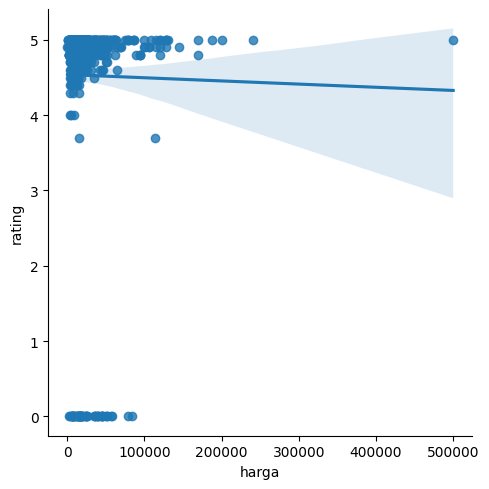

In [32]:
#Plot kedua variabel yang akan dianalisis
import seaborn as sns
sns.lmplot(data=data,x='harga', y='rating')

H0: Tidak ada korelasi antara harga dan rating

H1: Ada korelasi antara harga dan rating

In [33]:
#Jalankan analisis korelasi spearman
corr_rho, pval_s = stats.spearmanr(data['harga'], data['rating'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: 0.09, p-value: 0.011148207712514591


Nilai rho-correlation sebesar 0,09 menunjukan adanya korelasi positif dimana jika harga naik maka rating juga naik. Lalu Nilai p-value sebesar 0.011148207712514591 menunjukkan bahwa terdapat bukti yang cukup untuk menolak hipotesis nol. Artinya, ada korelasi antara harga dan rating. `Disimpulkan bahwa orang tidak lebih cenderung suka dengan produk yang harganya murah.`